In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, iqr
import seaborn as sns
from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport
import matplotlib
matplotlib.use('qtagg')

C:\Users\pompo\AppData\Local\Temp\ipykernel_13440\1367857302.py:9: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('qtagg')


In [3]:
file_path = r"D:\Work\Python\AnalysisEDA\Housing.csv" 
data = pd.read_csv(file_path) #Чтение данных csv

Предварительное изучение данных

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [70]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [39]:
data.duplicated().sum() 

np.int64(0)

В данном датасете отсутствуют пропуски и дубликаты

In [119]:
data.describe() #Анализ описательной статистики

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Проверка распределений

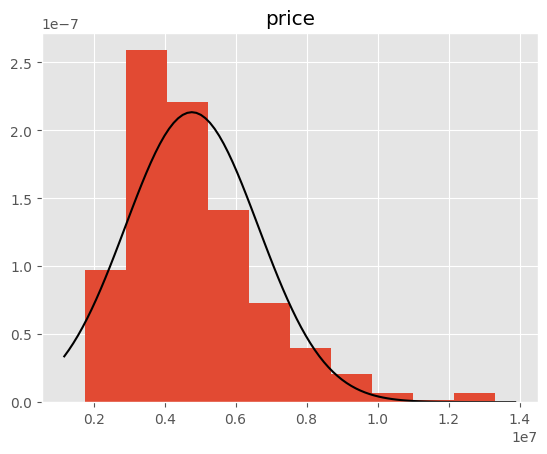

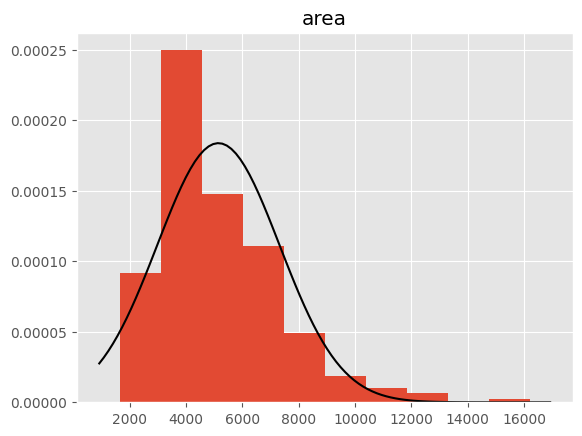

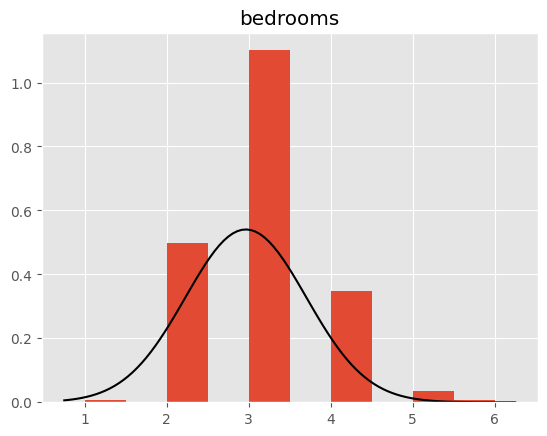

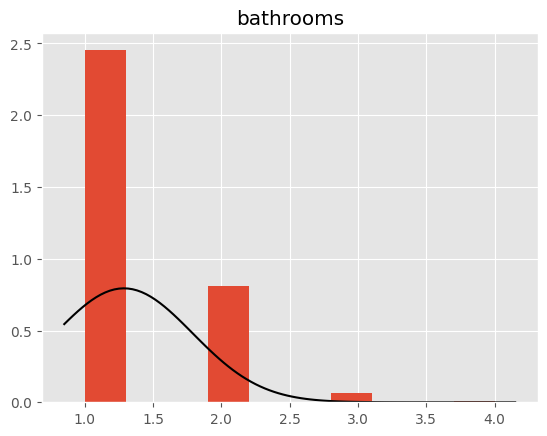

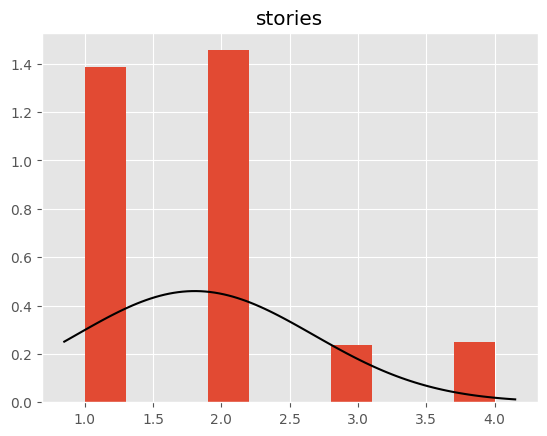

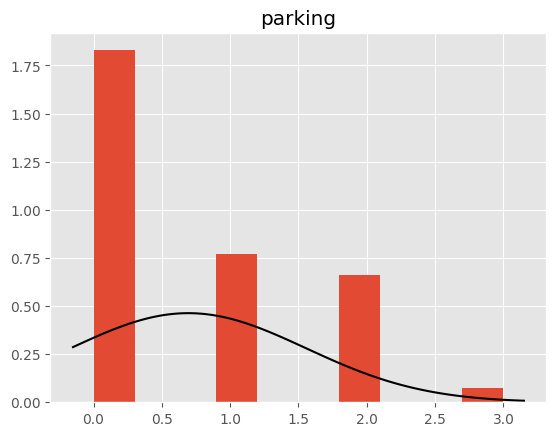

In [92]:
int_cols = data.select_dtypes('int').columns
for label in int_cols:
    #Построение гистограмм плотности распределения для каждого столбца
    plt.hist(data[label], bins=10, density=True)

    #Построение кривой нормального распределения
    am, std = data[label].mean(), data[label].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, am, std)
    plt.plot(x, p, "k")

    plt.title(label)
    plt.show()

Выявление выбросов по наиболее важным показателям

-35000.0 < price < 9205000.0
-540.0 < area < 10500.0


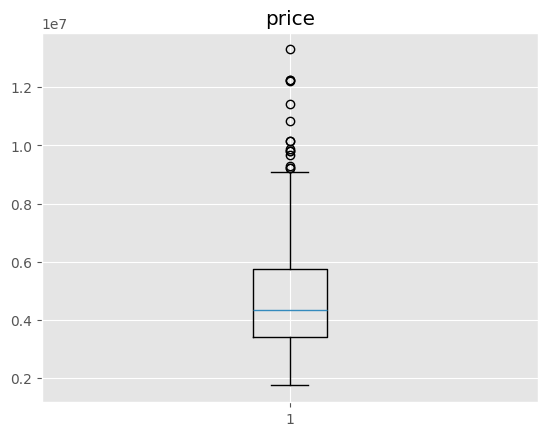

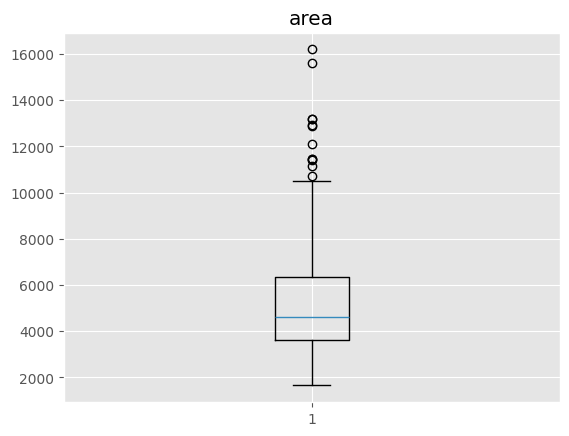

In [101]:
#Вычислить IQR 
price_IQR = iqr(data["price"])
area_IQR = iqr(data["area"])

#Вычислить границы выбросов
price_max = data["price"].quantile(0.75) + 1.5 * price_IQR
price_min = data["price"].quantile(0.25) - 1.5 * price_IQR
print(price_min, "< price <", price_max)

area_max = data["area"].quantile(0.75) + 1.5 * area_IQR
area_min = data["area"].quantile(0.25) - 1.5 * area_IQR
print(area_min, "< area <", area_max)

plt.boxplot(data["price"])
plt.title("price")
plt.show()

plt.boxplot(data["area"])
plt.title("area")
plt.show()

Анализ асимметрии и эксцесса

In [104]:
print("Асимметрия price =", data["price"].skew())
print("Эксцесс price =", data["price"].kurt(), "\n")
print("Асимметрия area =", data["area"].skew())
print("Эксцесс area =", data["area"].kurt())

Асимметрия price = 1.2122388370279802
Эксцесс price = 1.9601302314151994 

Асимметрия area = 1.321188343153483
Эксцесс area = 2.7514801872608086


Корреляционный анализ

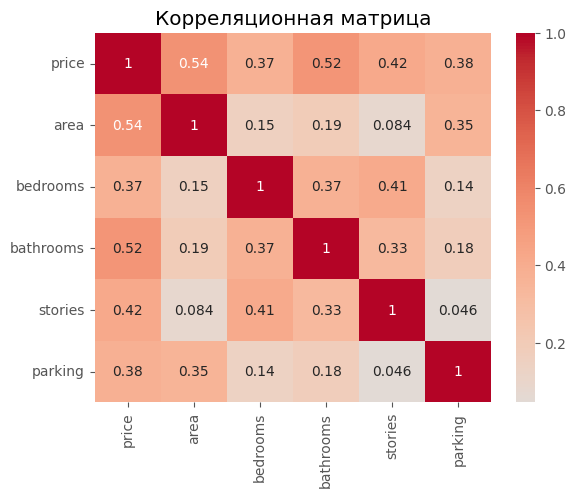

In [115]:
# Вычисление корреляционной матрицы
correlation_matrix = data.select_dtypes('int').corr()

# Вывод корреляционной матрицы
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
plt.show()

Графичесĸий анализ зависимостей

In [26]:
plt.scatter(data["area"], data["price"], alpha=0.5)
plt.title("Цены на дома в зависимости от площади", fontsize=16, fontweight="bold")
plt.xlabel("Площадь", fontsize=14)
plt.ylabel("Цена", fontsize=14)
plt.show()
plt.scatter(data["bedrooms"], data["price"], alpha=0.5)
plt.title("Цены на дома в зависимости от количества комнат", fontsize=16, fontweight="bold")
plt.xlabel("Количество комнат", fontsize=14)
plt.ylabel("Цена", fontsize=14)
plt.show()

Категориальные переменные

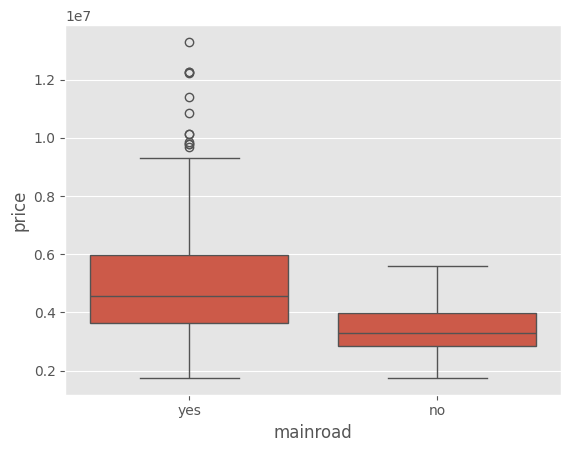

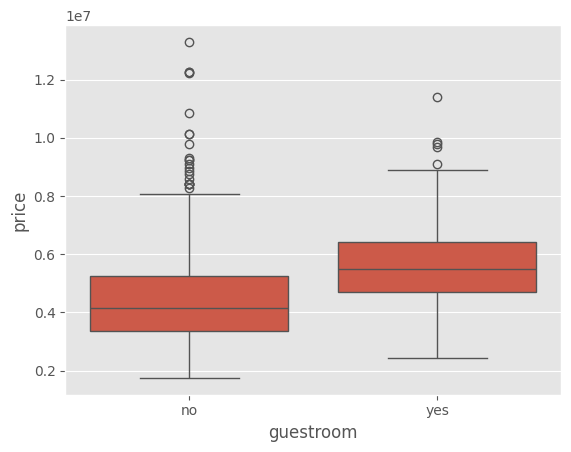

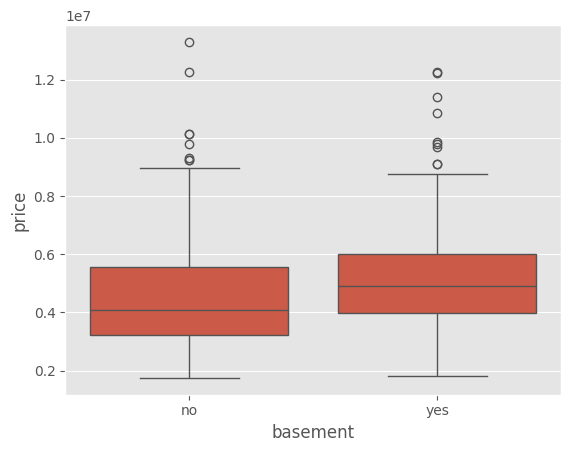

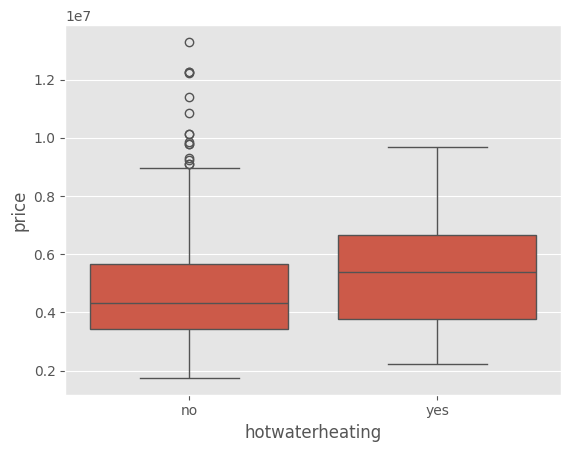

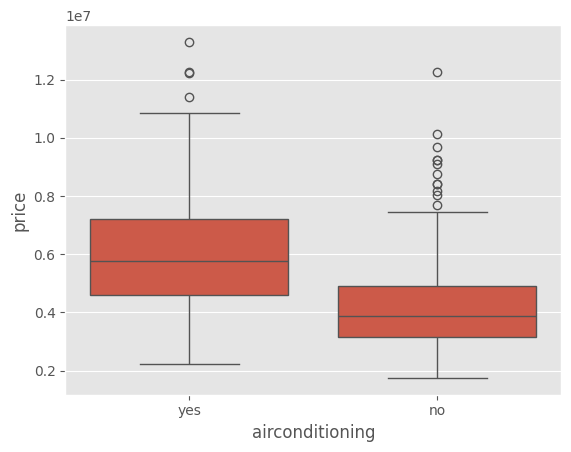

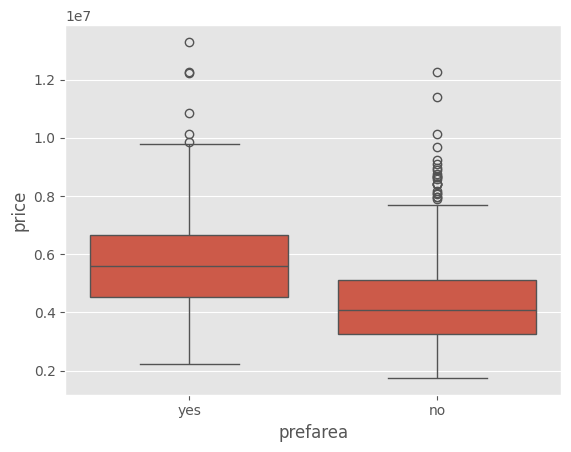

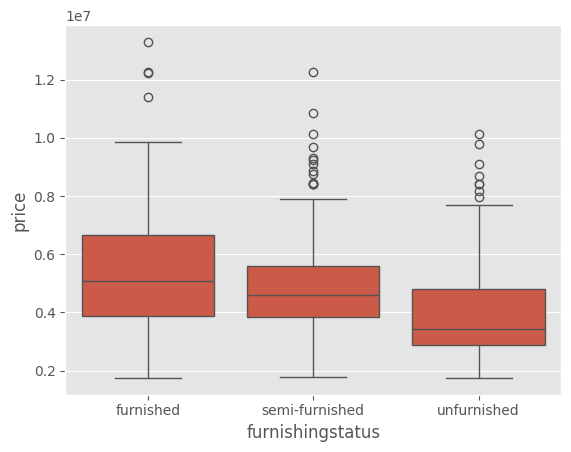

In [124]:
object_cols = data.select_dtypes('object').columns
for label in object_cols:
    sns.boxplot(x = data[label], y = data["price"])
    plt.show()

Парные графики

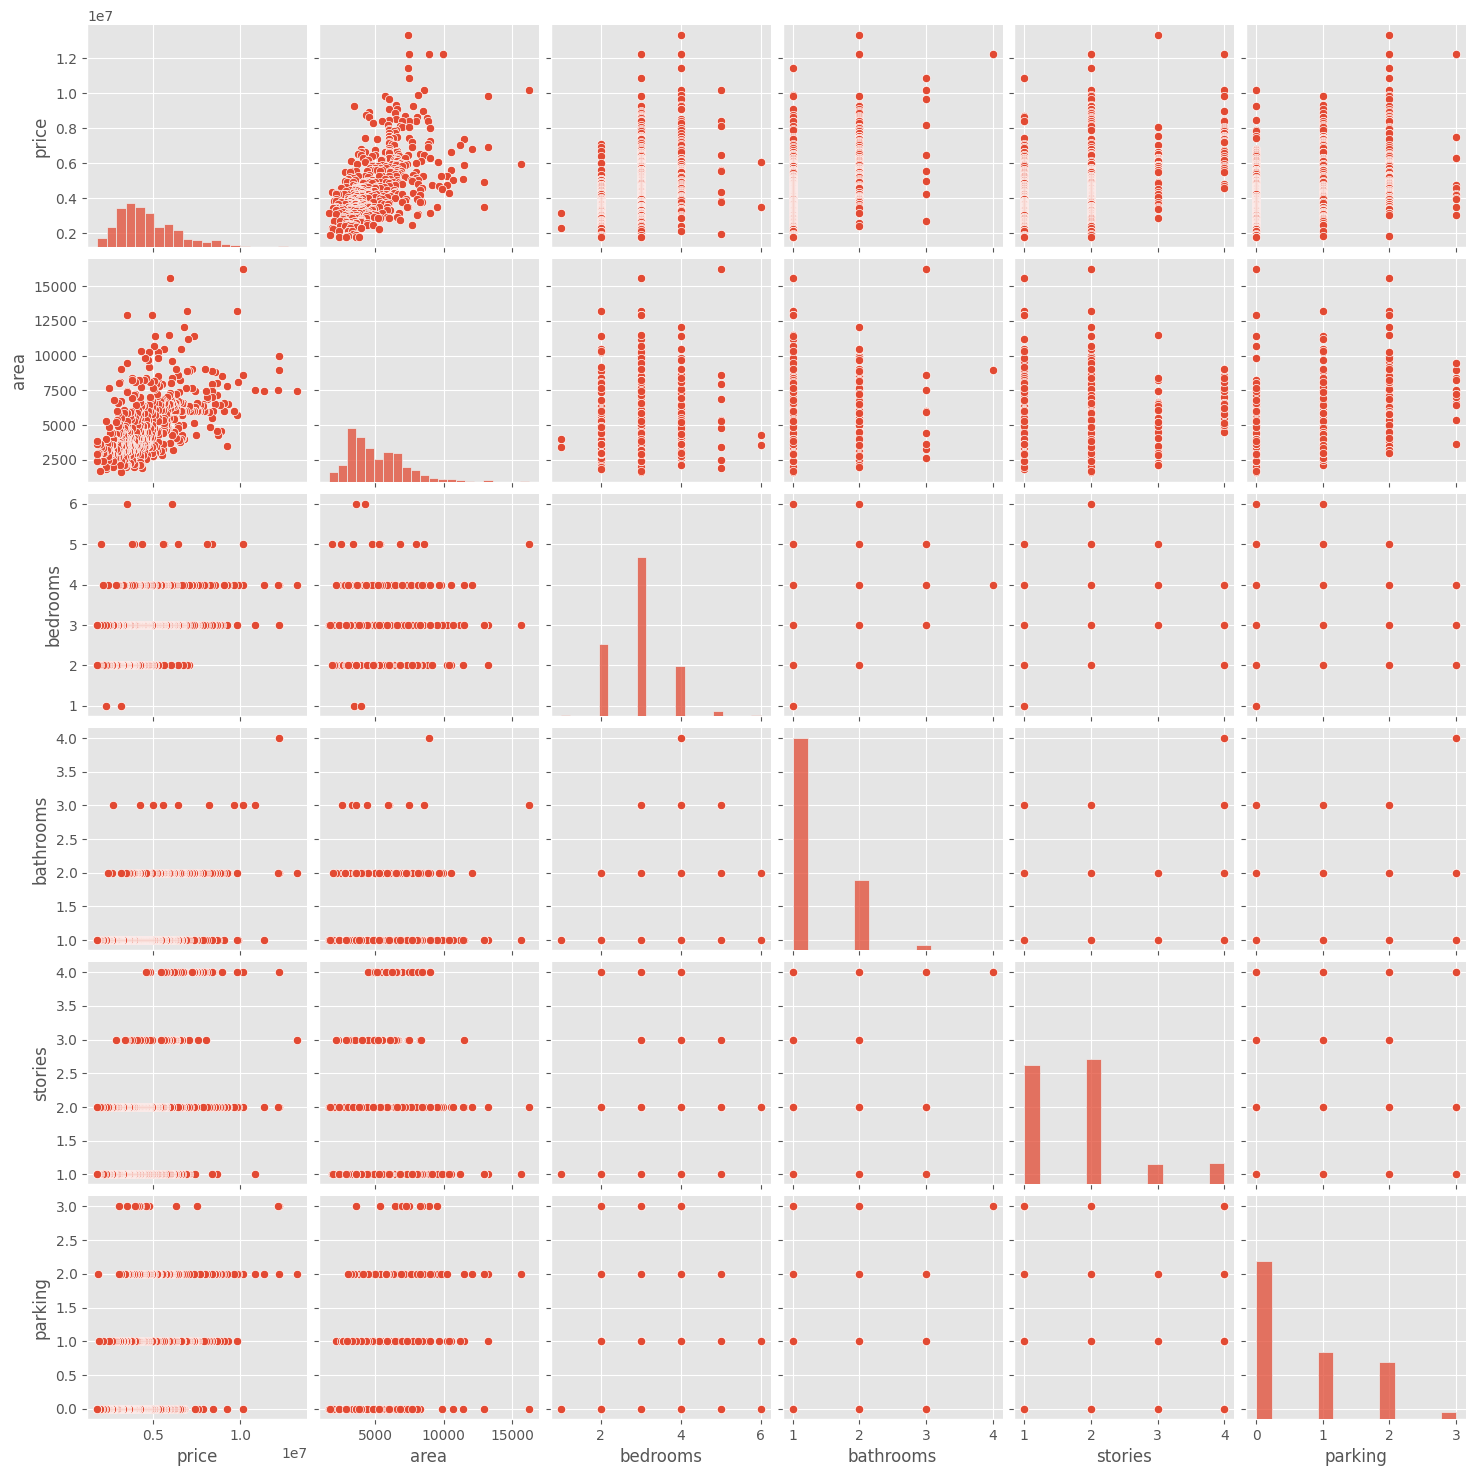

In [126]:
sns.pairplot(data)
plt.show()

Автоматизация анализа

In [4]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]